# Homework 3: Tables and Charts
Reading: Textbook chapters [5](http://www.inferentialthinking.com/chapters/05/tables.html) and [6](https://www.inferentialthinking.com/chapters/06/visualization.html).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw03.ok')
_ = ok.auth(inline=True)

Assignment: Homework 3: Tables and Charts
OK, version v1.12.5

Successfully logged in as kcs1992@berkeley.edu


<font color="#E74C3C">**Important**: The `ok` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).</font>

## 1. Differences between Universities, Part II


**Question 1.** Suppose you're choosing a university to attend, and you'd like to *quantify* how *dissimilar* any two universities are.  You rate each university you're considering on several numerical traits.  You decide on a very detailed list of 1000 traits, and you measure all of them!  Some examples:

* The cost to attend (per year)
* The average Yelp review of nearby Thai restaurants
* The USA Today ranking of the Medical school
* The USA Today ranking of the Engineering school

You decide that the dissimilarity between two universities is the *total* of the differences in their traits.  That is, the dissimilarity is:

* the **sum** of
* the absolute values of
* the 1000 differences in their trait values.

In the next cell, we've loaded arrays containing the 1000 trait values for Stanford and Berkeley.  Compute the dissimilarity (according to the above method) between Stanford and Berkeley.  Call your answer `dissimilarity`.  Use a single line of code to compute the answer.

*Note:* The data we're using aren't real -- we made them up for this exercise, except for the cost-of-attendance numbers, which we estimated for a student from a median-income family living in California using [this tool](http://college-tuition.startclass.com).

In [72]:
stanford = Table.read_table("stanford.csv").column("Trait value")
berkeley = Table.read_table("berkeley.csv").column("Trait value")

dissimilarity = sum(abs(stanford-berkeley))
dissimilarity

14060.558701067917

In [9]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Identify all the subexpressions in your answer to the previous question, excluding the whole expression itself.  Write each on its own line.  Before each one, write a one-line comment describing the value of the subexpression, including what type of value it is.  We've written the first one for you.  (It should appear somewhere in your answer to the previous question!)

In [73]:
stanford-berkeley


array([ -5.61600000e+03,   2.41979515e+00,   1.97372327e+01,
        -1.21378628e+01,  -2.47006573e+00,   1.34441019e+00,
        -3.00684613e+01,   9.02123498e-01,   9.73692348e+00,
         5.10505479e+00,   1.41208547e+01,  -2.41895300e-01,
         2.91122014e+01,  -5.35688027e-01,   2.59284879e+00,
        -2.42488140e+00,   8.21891530e-01,   2.44133240e+01,
         3.38664338e-01,   1.82125839e+00,  -2.11965349e-01,
         9.66773373e-01,   1.83297789e+01,   8.07627632e+00,
        -1.00426323e+01,  -7.19553024e+00,   3.34766992e+01,
        -7.53576197e+00,  -9.05351376e-01,  -3.67089507e-01,
         9.82798368e+00,   1.71004011e-01,   2.32624206e+01,
        -3.49601069e+01,  -5.71255825e+00,  -1.20670294e+01,
        -2.72517490e-01,  -1.83015949e+01,   1.64402761e+00,
         8.15170025e-01,   4.19736706e+00,   1.90515081e+01,
        -5.47656323e-01,  -5.51614634e+00,   6.43273434e+00,
        -6.78062557e+00,  -1.78974219e+01,   9.35305831e-01,
         2.43012236e+00,

In [16]:
# An array of 1000 numbers, each a different measured trait of Stanford University.
stanford # whole expressions
berkeley # whole expressions
stanford-berkeley #the 1000 differences in their trait values.
abs(stanford-berkeley)#abs value of 1000 differences
sum(abs(stanford-berkeley))# sum up the 1000 differences


type(stanford) #numpy.ndarray
type(berkeley) #numpy.ndarray
 


numpy.ndarray

**Question 3.** Why do we sum up the absolute values of the differences in trait values, rather than just summing up the differences?

*Without the absolute values, the number could become negative and it might not be meaningful.*

##### Weighing the traits
After computing dissimilarities between several schools, you notice a problem with your method: the scale of the traits matters a lot.

Since schools cost tens of thousands of dollars to attend, the cost-to-attend trait is always a much bigger *number* than most other traits.  That makes it affect the dissimilarity a lot more than other traits.  Two schools that differ in cost-to-attend by \$900, but are otherwise identical, get a dissimilarity of 900.  But two schools that differ in graduation rate by .9 (a huge difference!), but are otherwise identical, get a dissimilarity of only .9.

One way to fix this problem is to assign different "weights" to different traits.  For example, we could fix the problem above by multiplying the difference in the cost-to-attend traits by .001, so that a difference of \$900 in cost-to-attend results in a dissimilarity of $900 \times .001$, or $.9$.

Here's a revised method that does that for every trait:

1. For each trait, subtract the two schools' trait values.
2. Then take the absolute value of that difference.
3. *Now multiply that absolute value by a trait-specific number, like .001 or 2.*
4. Now sum the 1000 resulting numbers.

**Question 4.** Suppose you've already decided on a weight for each trait.  These are loaded into an array called `weights` in the cell below.  `weights.item(0)` is the weight for the first trait, `weights.item(1)` is the weight for the second trait, and so on.  Use the revised method to compute a revised dissimilarity between Berkeley and Stanford.

*Hint:* Using array arithmetic, your answer should be almost as short as in question 1.

In [74]:
weights = Table.read_table("weights.csv").column("Weight")

revised_dissimilarity = sum(abs(stanford-berkeley)*weights)
revised_dissimilarity

505.98313211458805

In [75]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below we've loaded data on unemployment in the United States.  There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

In [2]:
unemployment = Table.read_table('unemployment.csv')

unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [26]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Sort the data in decreasing order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in decreasing order by NEI-PTER instead.

In [3]:
by_nei = unemployment.sort('NEI',descending=True)
by_nei
by_nei_pter = unemployment.sort('NEI-PTER', descending=True)
by_nei_pter

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2009-07-01,10.8089,12.7404
2010-01-01,10.9054,12.7311
2010-04-01,10.6597,12.5664
2009-04-01,10.7082,12.5497
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [81]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

In [4]:
greatest_nei = (unemployment.sort('NEI', descending=True)).take(np.arange(0,10,1))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [92]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [5]:
pter = unemployment.column("NEI-PTER")-unemployment.column("NEI")
pter

array([ 1.0746,  1.1644,  1.1555,  1.129 ,  1.2139,  1.0757,  1.1282,
        1.1114,  1.0529,  1.0744,  1.1004,  1.0747,  1.0705,  1.0455,
        1.008 ,  0.9734,  0.9753,  0.8931,  0.9451,  0.8367,  0.8208,
        0.8105,  0.8248,  0.7578,  0.7251,  0.7445,  0.7543,  0.7423,
        0.7399,  0.7687,  0.8418,  0.9923,  0.9181,  0.9629,  0.9703,
        0.9575,  1.0333,  1.0781,  1.0675,  1.0354,  1.0601,  1.01  ,
        1.0042,  1.0368,  0.9704,  0.923 ,  0.9759,  0.93  ,  0.889 ,
        0.821 ,  0.9409,  0.955 ,  0.898 ,  0.8948,  0.9523,  0.9579,
        1.0149,  1.0762,  1.2873,  1.4335,  1.7446,  1.8415,  1.9315,
        1.8859,  1.8257,  1.9067,  1.8376,  1.8473,  1.7993,  1.8061,
        1.7651,  1.7927,  1.7286,  1.6387,  1.6808,  1.6805,  1.6629,
        1.6253,  1.6477,  1.6298,  1.4796,  1.5131,  1.4866,  1.4345,
        1.3675,  1.3097,  1.2319,  1.1735,  1.1844,  1.1746])

In [90]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in decreasing order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [6]:
by_pter = unemployment.with_columns("PTER", pter).sort("PTER", descending=True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


In [103]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Does it seem true that the PTER rate was very high during the Great Recession, compared to other periods in the dataset? Justify your answer by referring to specific values in the table or by generating a chart.

In [21]:
#by_pter.show().sort("Date", descending=True)

#type(by_pter.column("Date").item(0))
by_pter.where("Date", are.below("2010-12-30")).sort("Date", descending=True).show()

Date,NEI,NEI-PTER,PTER
2010-10-01,10.5856,12.4329,1.8473
2010-07-01,10.5521,12.3897,1.8376
2010-04-01,10.6597,12.5664,1.9067
2010-01-01,10.9054,12.7311,1.8257
2009-10-01,10.9698,12.8557,1.8859
2009-07-01,10.8089,12.7404,1.9315
2009-04-01,10.7082,12.5497,1.8415
2009-01-01,10.2693,12.0139,1.7446
2008-10-01,9.2555,10.689,1.4335
2008-07-01,8.884,10.1713,1.2873


*As i look at the table for PTER during Great Recession was high becuase right before 2008,
it was about 1.00 and becomes 1.93 by the end of the Recession*

## 3. Birth Rates


The following table gives census-based population estimates for each state on July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. *For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.*

In [23]:
# Don't change this cell; just run it.
# From http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv
# See http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf
#     for column descriptions. (As of Feb 2017, no descriptions were posted for 2010-2016.)
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled(2, '2015').relabeled(3, '2016')
pop = pop.relabeled(4, 'BIRTHS').relabeled(5, 'DEATHS')
pop = pop.relabeled(6, 'MIGRATION').relabeled(7, 'OTHER')
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the number of births in that period as a proportion of the population at the start of the period.

In [25]:
us_birth_rate = sum(pop.column("BIRTHS"))/sum(pop.column('2015'))
us_birth_rate

0.012358536498646102

In [107]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Assign `fastest_growth` to an array of the names of the five states with the fastest population growth rates in *descending order of growth rate*.

In [129]:
growth = (pop.column("2016")-pop.column("2015"))/pop.column("2015")
fastest_growth = (
    pop.with_columns("Growth",growth).sort("Growth", descending=True).
    take(np.arange(0,5,1)).column("NAME"))
        
        
                                                          


fastest_growth

array(['Utah', 'Nevada', 'Idaho', 'Florida', 'Washington'], 
      dtype='<U20')

In [130]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Assign `movers` to the number of states for which the absolute annual rate of migration was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

In [26]:
mi_growth = abs(pop.column("MIGRATION"))/pop.column("2015")
movers = (
    pop.with_columns("MI_GROWTH",mi_growth).
    where("MI_GROWTH",are.above(0.01)).column("NAME")
)

movers = len(movers)

In [153]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). *Hint:* Make sure you double check the type of the values in the region column.

In [27]:
type(pop.column("REGION").item(0))


west_births = sum(pop.where("REGION", are.equal_to("4")).column("BIRTHS"))
west_births

979657

In [179]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *number of babies born in region 4 (the Western US)* during this time interval.

In [28]:
less_than_west_births=pop.where("2016", are.below(west_births)).num_rows
#less_than_west_births = (pop.where("NAME", are.below(west_births)))
less_than_west_births

7

In [213]:
_ = ok.grade('q3_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Was there an association between birth rate and death rate during this time interval? Use the code cell below to support your conclusion with a chart. If an association exists, what might explain it?

*Write your answer here, replacing this text.*

In [29]:
pop.where("2016", are.below(west_births))

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
3,Delaware,"944,076","952,065","10,922","8,945","5,583",429
3,District of Columbia,"670,377","681,170","9,779","5,455","6,392",77
2,North Dakota,"756,835","757,952","11,824","6,172","-4,684",149
2,South Dakota,"857,919","865,454","12,114","7,296","2,573",144
1,Vermont,"626,088","624,594","6,035","5,547","-1,910",-72
4,Wyoming,"586,555","585,501","7,590","4,838","-3,823",17


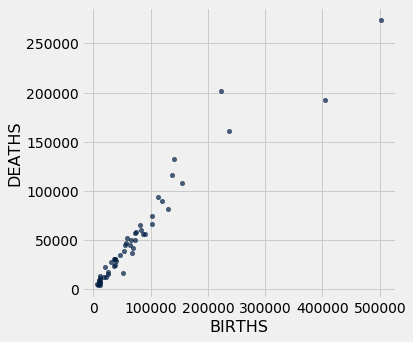

In [32]:
# Generate a chart here to support your conclusion
pop.scatter('BIRTHS', 'DEATHS') #Since it's linearly increasing, there's an positive association between them.

## 4. Marginal Histograms


Consider the following scatter plot: ![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

**Question 1:** Match each of the following histograms to the code that produced them. Explain your reasoning.

**Histogram A:** ![](var1.png)
**Histogram B:** ![](var2.png)

**Line 1:** `t.hist('x')`

**Histogram for Line 1:**
Histogram B

**Explanation:**
According to the scatter plot, its range for x-values is -2 to 3 and Hist B represents the range of x-values.

**Line 2:** `t.hist('y')`

**Histogram for Line 2:**
Histogram A
**Explanation:**
According to the scatter plot, there's a gap for y inbetween -0.5 and 0.5 and Histogram A
indicates there's no values inbetween -0.5 and 0.5.

## 5. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [ ]:
_ = ok.submit()